# 1. Importation des bibliothèques

In [ ]:
# Bibliothèques standards
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Standardisation des données (pour que toutes les variables soient comparables entre elles)
from sklearn.preprocessing import StandardScaler

# Analyse en Composantes Principales (ACP)
from sklearn.decomposition import PCA

# Clustering hiérarchique
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Clustering k-means
from sklearn.cluster import KMeans

# Affichage plus clair des graphiques
sns.set(style="whitegrid")


#2. Importation des données nettoyées

In [ ]:
# Charger le fichier CSV contenant les données nettoyées
df_final = pd.read_csv("df_final.csv")

# Aperçu rapide pour vérifier que tout est bien chargé
print("Aperçu des données importées :")
display(df_final.head())


Aperçu des données importées :


,Zone,Distance_France (km),Population (1000 hab),PIB par habitant (USD),Consommation volaille (kcal/personne/jour),Production poulet (tonnes),Importation poulet (tonnes),Disponibilité alimentaire poulet (kcal/personne/jour),Stabilité politique (%),Ratio_Import_Production,Consommation_volaille_totale,Dispo_alim_totale
0,Afghanistan,5590.381,36296.113,534.020133,1.79,27637.84,28936.98,5.0,0.476190,1.047006,6.497004e+07,1.814806e+08
1,Albanie,1603.534,2884.169,4521.752217,11.55,12912.00,17515.46,85.0,59.523811,1.356526,3.331215e+07,2.451544e+08
2,Émirats arabes unis,5249.535,9487.203,43063.967477,27.33,57387.00,440543.30,147.0,66.666664,7.676709,2.592853e+08,1.394619e+09
3,Argentine,11072.250,43937.140,14609.783370,44.54,2116000.00,1785.87,182.0,53.333332,0.000844,1.956960e+09,7.996559e+09
4,Arménie,3434.071,2944.791,4041.995072,15.96,10600.00,34196.00,54.0,25.238094,3.226038,4.699886e+07,1.590187e+08


# 3. Préparation des données pour l’ACP

In [ ]:
# Sélection des colonnes numériques pertinentes pour l’ACP
colonnes_acp = [
    'Distance_France (km)',
    'Population (1000 hab)',
    'PIB par habitant (USD)',
    'Consommation volaille (kcal/personne/jour)',
    'Production poulet (tonnes)',
    'Importation poulet (tonnes)',
    'Disponibilité alimentaire poulet (kcal/personne/jour)',
    'Stabilité politique (%)',
    'Ratio_Import_Production',
    'Consommation_volaille_totale',
    'Dispo_alim_totale'
]

# Extraction des données à analyser (sans les noms de pays)
X = df_final[colonnes_acp]

# Standardisation des données (moyenne 0, écart-type 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 4. Réalisation de l'ACP


Dans ce bloc, on applique une Analyse en Composantes Principales (ACP) sur les données standardisées.
L’ACP nous permet de réduire le nombre de dimensions (variables), tout en conservant l’essentiel de l’information.

Elle crée de nouvelles variables synthétiques appelées composantes principales (PC1, PC2, etc.), qui sont des résumés optimaux des colonnes de départ.
On affiche ensuite la part de variance expliquée par chaque composante : cela correspond à la quantité d'information capturée par chacune.

In [ ]:
# 🧠 Création et application de l'ACP
pca = PCA()  # On crée l'objet PCA sans limiter le nombre de dimensions
X_pca = pca.fit_transform(X_scaled)  # On applique l'ACP sur les données standardisées

# 📊 Affichage de la part de variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_ * 100
print("Variance expliquée par chaque composante (%) :")
print(np.round(explained_variance, 2))


Variance expliquée par chaque composante (%) :
[3.223e+01 2.417e+01 1.341e+01 8.420e+00 7.700e+00 6.490e+00 4.780e+00
 2.360e+00 3.100e-01 1.000e-01 3.000e-02]


# 5. Éboulis des valeurs propres

Visualiser combien de composantes principales suffisent à expliquer la majorité de l'information.
Cela permet de choisir combien de dimensions (PC1, PC2, etc.) garder pour la suite.

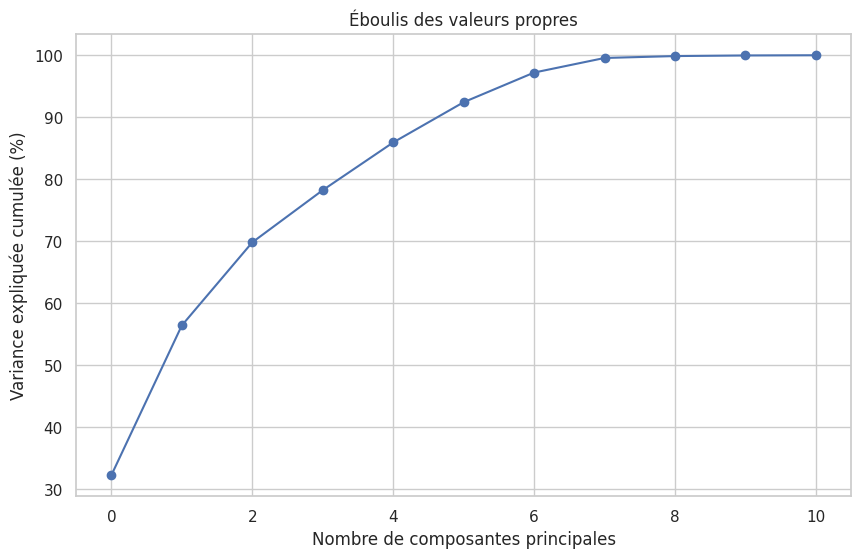

In [ ]:
# 📊 Affichage de l'éboulis des valeurs propres (variance expliquée)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title("Éboulis des valeurs propres")
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée cumulée (%)")
plt.grid(True)
plt.show()


L’éboulis montre que les 4 premières composantes principales permettent de conserver environ 80 % de l’information totale.
On peut donc réduire la dimension du jeu de données à 4 dimensions sans perdre trop d'information.

# 6. Cercle des corrélations


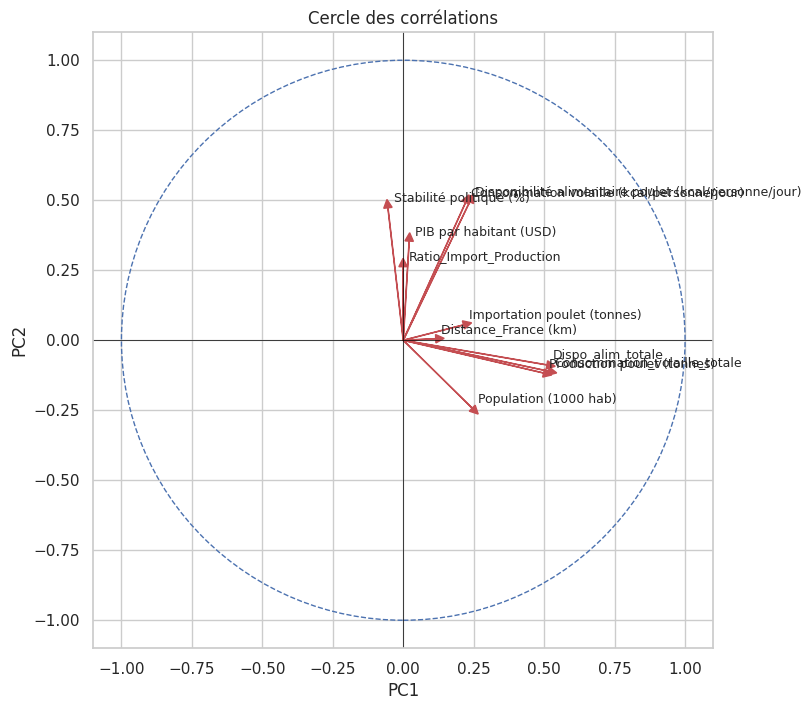

In [ ]:
# Permet de visualiser l’influence des variables sur les deux premières composantes

# Étape 1 : récupérer les coordonnées des variables
pcs = pca.components_[:2]  # On garde PC1 et PC2 (les 2 premières composantes)

# Étape 2 : tracer le cercle
plt.figure(figsize=(8, 8))
for i, (x, y) in enumerate(zip(pcs[0], pcs[1])):
    plt.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, fc='r', ec='r')
    plt.text(x + 0.02, y + 0.02, colonnes_acp[i], fontsize=9)

# Cercle unité
circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b', linestyle='--')
plt.gca().add_artist(circle)

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Cercle des corrélations")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()


Dans ce cercle des corrélations, on visualise l’influence de chaque variable sur les deux premières composantes principales (PC1 et PC2).  
Les variables les plus éloignées du centre (longues flèches) sont les mieux représentées.

Les groupes de flèches proches indiquent des variables corrélées entre elles :
- Par exemple : consommation de volaille, production de poulet, et disponibilité alimentaire vont dans la même direction.
- Le PIB par habitant et la stabilité politique sont également liés.

Les variables très proches du centre sont moins bien représentées dans ce plan.


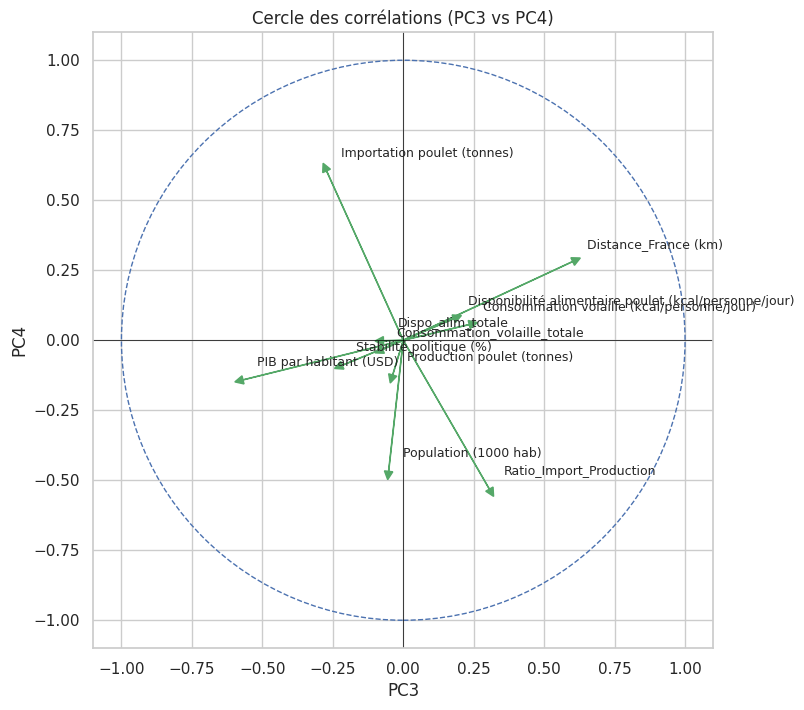

In [ ]:
# 🔄 Cercle des corrélations sur les composantes principales PC3 et PC4

# Étape 1 : récupérer les coordonnées des variables pour PC3 et PC4
pcs_34 = pca.components_[2:4]  # composantes 3 et 4

# Étape 2 : tracer le cercle
plt.figure(figsize=(8, 8))
for i, (x, y) in enumerate(zip(pcs_34[0], pcs_34[1])):
    plt.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, fc='g', ec='g')
    plt.text(x + 0.05, y + 0.05, colonnes_acp[i], fontsize=9)

# Cercle unité
circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b', linestyle='--')
plt.gca().add_artist(circle)

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel("PC3")
plt.ylabel("PC4")
plt.title("Cercle des corrélations (PC3 vs PC4)")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()


#7. Projection des pays dans le plan des deux premières composantes


Dans ce graphique, on projette chaque pays dans l’espace réduit formé par les deux premières composantes principales (PC1 et PC2), qui résument l’essentiel de l’information.

Les pays proches sur le graphique ont des profils similaires selon les variables de départ. Ceux qui sont éloignés (comme le Brésil ou l’Inde) ont un profil très spécifique.

Cette visualisation nous permet de détecter visuellement des groupes ou des pays atypiques.


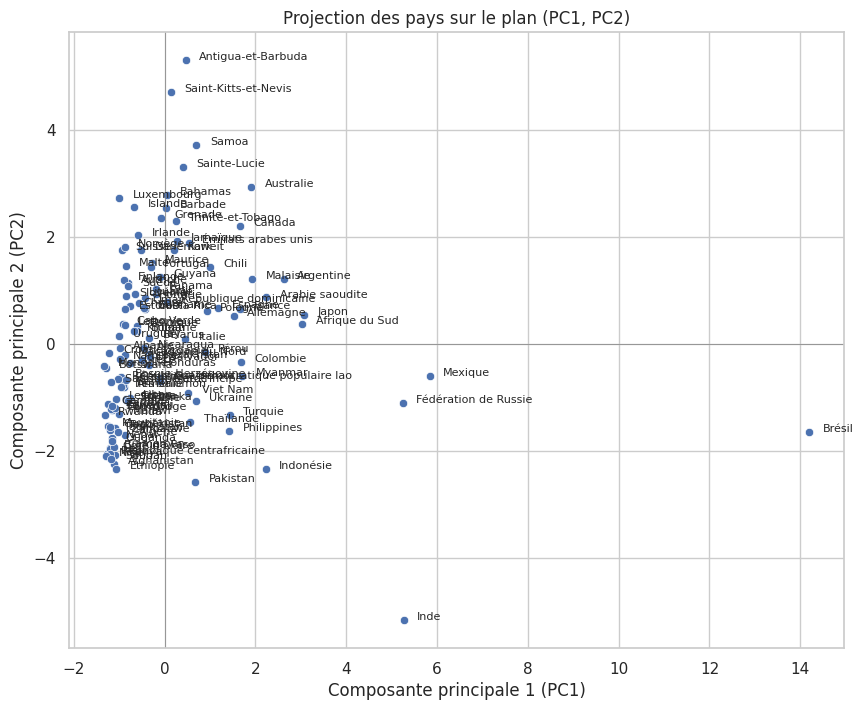

In [ ]:
# Création d’un DataFrame avec les coordonnées des pays dans le nouveau repère (PC1, PC2)
df_proj = pd.DataFrame(X_pca[:, :2], columns=["PC1", "PC2"])
df_proj["Zone"] = df_final["Zone"].values  # On ajoute les noms des pays

# Affichage de la projection des pays dans le plan des deux premières composantes
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_proj, x="PC1", y="PC2")
for i in range(len(df_proj)):
    plt.text(df_proj["PC1"][i]+0.3, df_proj["PC2"][i], df_proj["Zone"][i], fontsize=8)

plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.title("Projection des pays sur le plan (PC1, PC2)")
plt.xlabel("Composante principale 1 (PC1)")
plt.ylabel("Composante principale 2 (PC2)")
plt.grid(True)
plt.show()


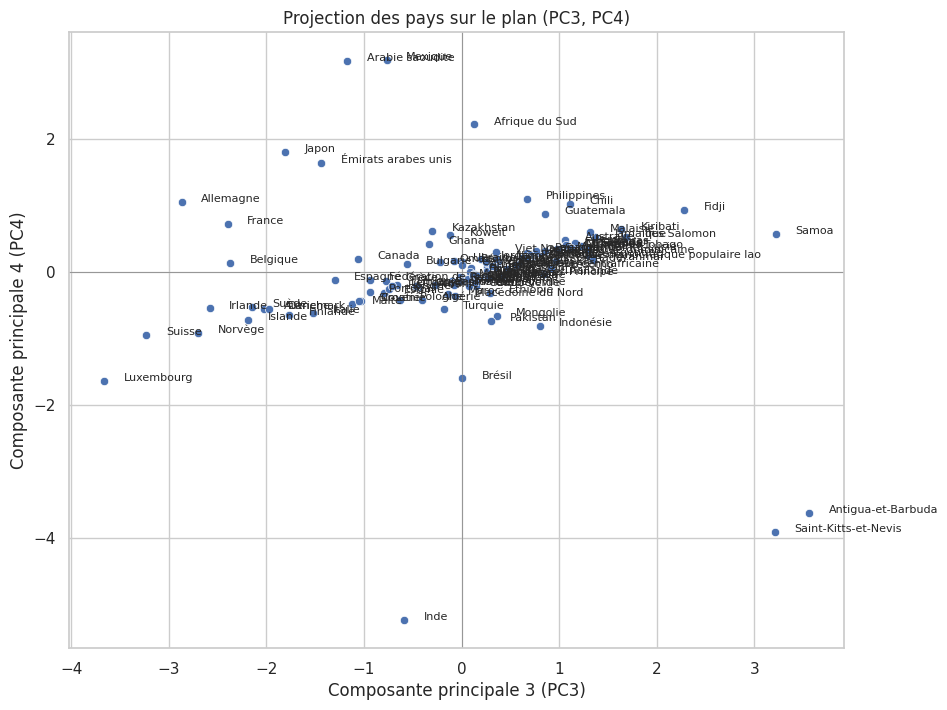

In [ ]:
# Création d’un DataFrame avec les coordonnées des pays dans le plan PC3 / PC4
df_proj["PC3"] = X_pca[:, 2]
df_proj["PC4"] = X_pca[:, 3]

# Affichage de la projection des pays dans le plan PC3 / PC4
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_proj, x="PC3", y="PC4")

# Ajout des noms de pays
for i in range(len(df_proj)):
    plt.text(df_proj["PC3"][i]+0.2, df_proj["PC4"][i], df_proj["Zone"][i], fontsize=8)

# Habillage du graphe
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.title("Projection des pays sur le plan (PC3, PC4)")
plt.xlabel("Composante principale 3 (PC3)")
plt.ylabel("Composante principale 4 (PC4)")
plt.grid(True)
plt.show()


## Projection des pays dans le plan des composantes principales PC3 et PC4

#8. Classification Ascendante Hiérarchique (CAH)

Dans ce bloc, on réalise une Classification Ascendante Hiérarchique (CAH) à partir des données réduites par l’ACP (les composantes principales).
La CAH permet de regrouper les pays selon leur profil en construisant un arbre appelé dendrogramme.
Ce graphique montre à quel point les pays sont similaires ou différents, en partant de ceux qui se ressemblent le plus (feuilles de l’arbre) jusqu’aux regroupements plus larges (branches).

Grâce à cela, on pourra décider plus tard combien de groupes (clusters) on veut former, en coupant l’arbre à un certain niveau.

Nous avons coupé le dendrogramme à une hauteur de 10, car après la distance est trop grand. au-dessus les groupe aurait été trop différent.

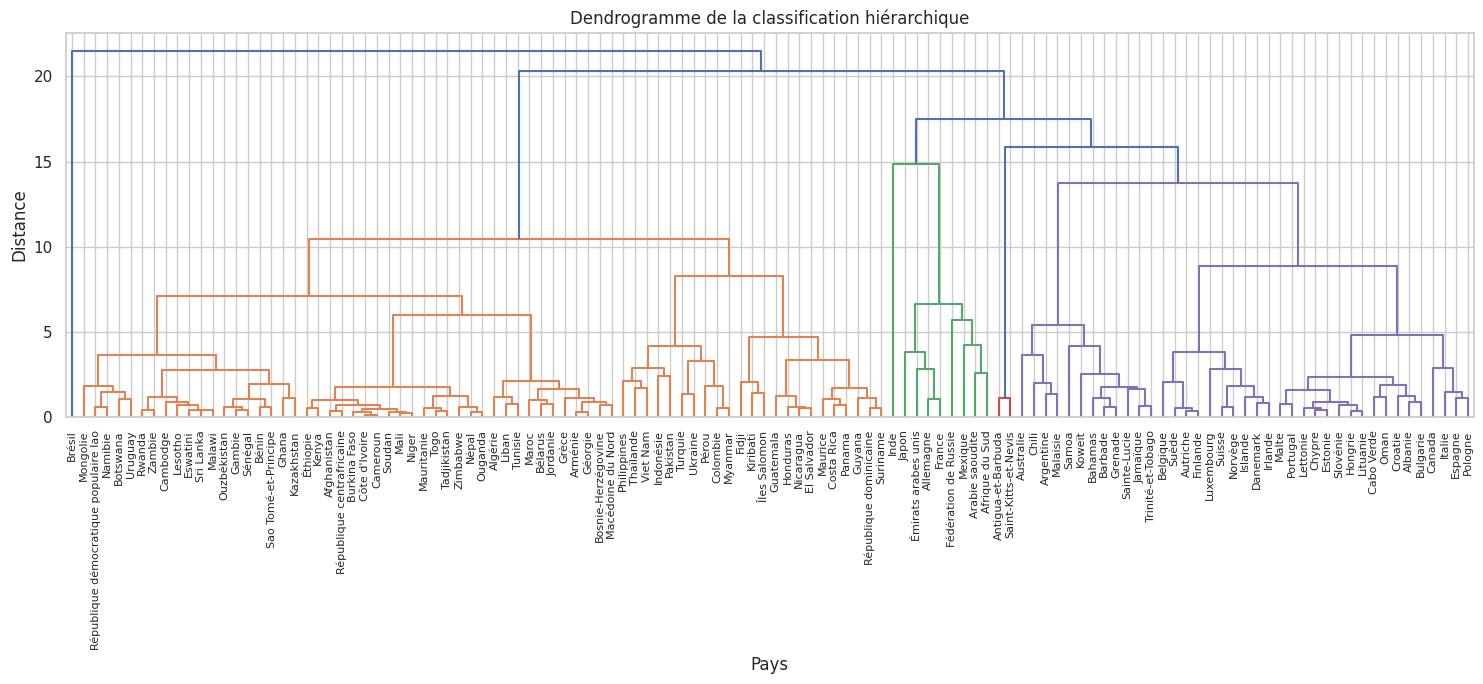

In [ ]:
# Création du dendrogramme pour visualiser les regroupements hiérarchiques
plt.figure(figsize=(15, 7))

# On utilise les données de l'ACP (PC1, PC2, etc.)
linkage_matrix = linkage(X_pca, method='ward')  # Ward = méthode qui minimise la variance intra-groupe
dendrogram(linkage_matrix, labels=df_final["Zone"].values, leaf_rotation=90, leaf_font_size=8)

plt.title("Dendrogramme de la classification hiérarchique")
plt.xlabel("Pays")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


# 9. Attribution des clusters avec la CAH

Dans cette section, nous appliquons une Classification Ascendante Hiérarchique (CAH) pour regrouper les pays selon leurs similarités, à partir des composantes de l'ACP (PC1, PC2, etc.).

Nous avons utilisé le dendrogramme pour visualiser les regroupements possibles. En coupant à une distance de 10, nous identifions 4 grands groupes de pays, représentés par des couleurs différentes dans l’arbre. Ce choix se justifie par la présence de grandes barres verticales indiquant des regroupements naturels.

Ensuite, chaque pays se voit attribuer un numéro de groupe (Groupe_CAH) pour pouvoir poursuivre l’analyse.


In [ ]:
# Création de groupes (clusters) à partir du dendrogramme (on coupe à distance = 10)
from scipy.cluster.hierarchy import fcluster

# On choisit ici de former 4 groupes (clusters)
clusters_cah = fcluster(linkage_matrix, t=4, criterion='maxclust')

# Ajout des groupes dans le dataframe des pays projetés (PC1, PC2)
df_proj["Cluster_CAH"] = clusters_cah

# Aperçu
df_proj.head()


,PC1,PC2,Zone,PC3,PC4,Cluster_CAH
0,-1.105924,-2.244390,Afghanistan,0.364585,0.101535,1
1,-0.985959,-0.085397,Albanie,-0.445732,-0.216927,3
2,0.532399,1.896680,Émirats arabes unis,-1.439584,1.642953,2
3,2.624668,1.223346,Argentine,1.310213,0.241055,3
4,-0.901593,-0.812183,Arménie,0.094720,0.059268,1


#10. Visualisation des clusters CAH sur la projection (PC1, PC2)


Dans ce graphique, chaque pays est représenté dans le plan formé par les deux premières composantes principales (PC1 et PC2), qui résument l’essentiel de l’information du jeu de données.
Les points sont colorés selon leur appartenance à l’un des 4 clusters définis par la Classification Ascendante Hiérarchique (CAH).

Cette visualisation permet de :

Vérifier la cohérence du clustering : les pays d’un même groupe sont globalement proches les uns des autres.

Identifier des pays atypiques : comme le Brésil ou l’Inde, qui sont très éloignés des autres dans l’espace des composantes.

Observer la structure des groupes formés par la CAH dans l’espace réduit de l’ACP.

C’est une étape importante pour interpréter visuellement les résultats du clustering et juger de la qualité des regroupements.

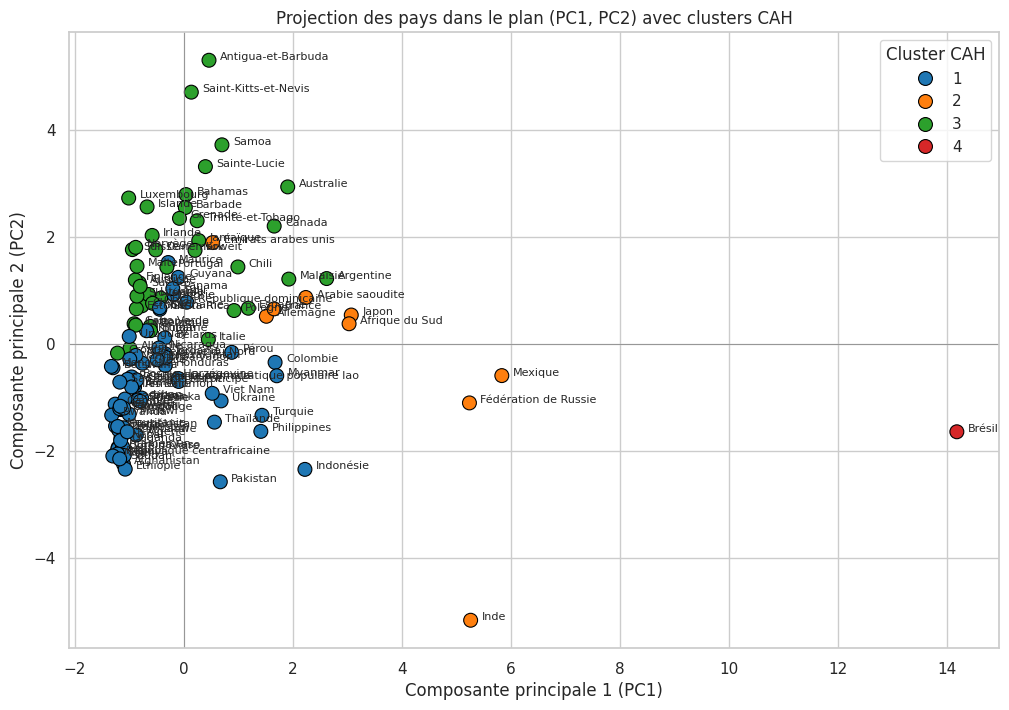

In [ ]:
# Affichage de la projection des pays avec les couleurs selon leur cluster CAH

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_proj,
    x="PC1", y="PC2",
    hue="Cluster_CAH",
    palette="tab10",
    s=100, edgecolor='black'
)

# Ajout des noms de pays
for i in range(len(df_proj)):
    plt.text(
        df_proj["PC1"][i] + 0.2,
        df_proj["PC2"][i],
        df_proj["Zone"][i],
        fontsize=8
    )

plt.title("Projection des pays dans le plan (PC1, PC2) avec clusters CAH")
plt.xlabel("Composante principale 1 (PC1)")
plt.ylabel("Composante principale 2 (PC2)")
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.grid(True)
plt.legend(title="Cluster CAH")
plt.show()


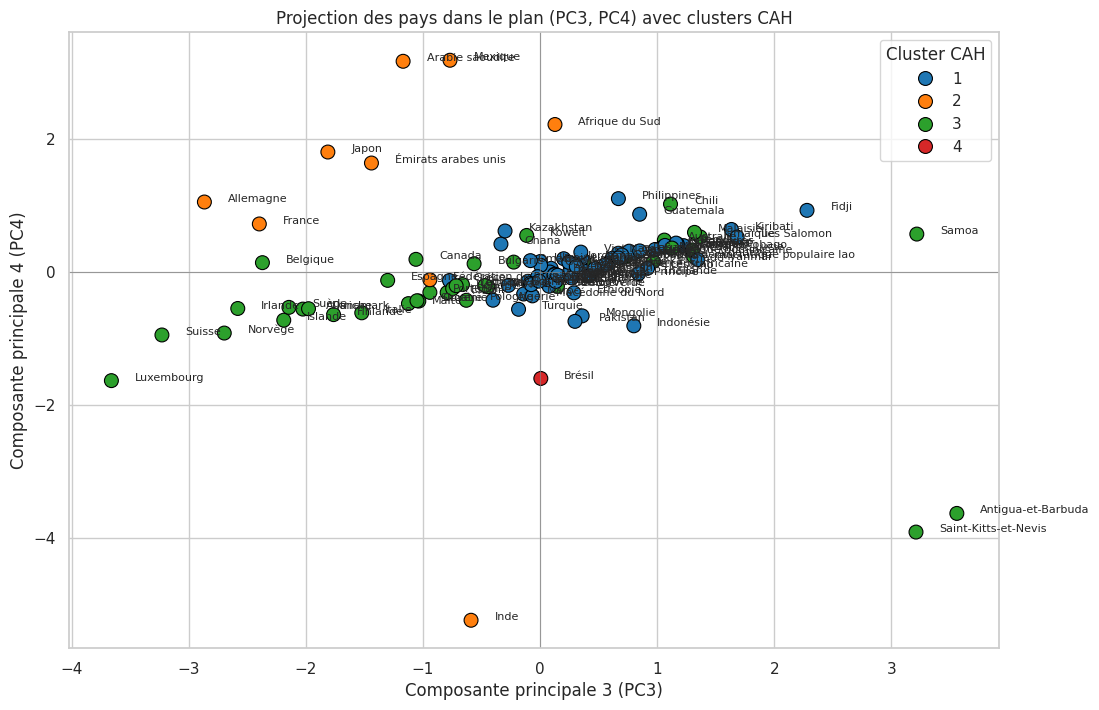

In [ ]:
# Visualisation des clusters CAH sur la projection (PC3, PC4)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_proj,
    x="PC3", y="PC4",
    hue="Cluster_CAH",
    palette="tab10",
    s=100,
    edgecolor="black"
)

# Ajout des noms des pays
for i in range(len(df_proj)):
    plt.text(
        df_proj["PC3"][i] + 0.2,
        df_proj["PC4"][i],
        df_proj["Zone"][i],
        fontsize=8
    )

plt.title("Projection des pays dans le plan (PC3, PC4) avec clusters CAH")
plt.xlabel("Composante principale 3 (PC3)")
plt.ylabel("Composante principale 4 (PC4)")
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.grid(True)
plt.legend(title="Cluster CAH")
plt.show()


#11. Analyse des clusters (tableau de synthèse par groupe)

Ce tableau présente la moyenne de chaque variable pour les 4 clusters formés par la CAH.

Il permet de comprendre les différences entre les groupes de pays. On peut par exemple identifier :
- Les pays les plus éloignés de la France (cluster 4),
- Ceux qui consomment le plus de volaille (cluster 3),
- Ou encore ceux qui produisent beaucoup mais importent peu (cluster 3).

Cette étape est essentielle pour **interpréter les résultats du clustering** et guider les décisions.


In [ ]:
# Ajouter les labels des clusters depuis df_proj (déjà attribués précédemment)
df_final["Cluster_CAH"] = df_proj["Cluster_CAH"]

# Créer un tableau de synthèse avec les moyennes des variables pour chaque cluster
# On enlève la colonne "Zone" qui n'est pas numérique
moyennes_par_cluster = df_final.drop(columns=["Zone"]).groupby("Cluster_CAH").mean().round(2)

# Afficher le tableau
print("Moyennes des variables pour chaque cluster (CAH) :")
display(moyennes_par_cluster)


Moyennes des variables pour chaque cluster (CAH) :


,Distance_France (km),Population (1000 hab),PIB par habitant (USD),Consommation volaille (kcal/personne/jour),Production poulet (tonnes),Importation poulet (tonnes),Disponibilité alimentaire poulet (kcal/personne/jour),Stabilité politique (%),Ratio_Import_Production,Consommation_volaille_totale,Dispo_alim_totale
Cluster_CAH,,,,,,,,,,,
1,6590.26,27027.59,4064.10,13.53,316203.03,23087.00,45.01,35.00,2.01,2.896278e+08,9.622872e+08
2,5312.91,220398.44,24134.41,25.93,2030291.74,453012.93,100.56,43.81,1.16,2.430771e+09,8.308412e+09
3,4275.29,10238.73,30418.52,33.03,324263.82,40667.49,119.59,73.33,16.06,3.311417e+08,1.185268e+09
4,8732.79,207833.82,9896.72,47.49,13607352.20,3305.78,204.00,29.52,0.00,9.870028e+09,4.239810e+10


 # 12. Clustering par K-Means et comparaison avec la CAH

Dans cette section, on applique une autre méthode de regroupement : K-Means, qui est une méthode de clustering non hiérarchique. Contrairement à la CAH (Classification Ascendante Hiérarchique), K-Means ne construit pas d’arbre, mais répartit directement les données en k groupes (ici, 4 clusters comme pour la CAH).

On utilise les mêmes composantes principales que pour la CAH (de PC1 à PC4), car elles concentrent l'essentiel de l'information (plus de 80 % de la variance totale).

On compare ensuite les résultats obtenus avec ceux de la CAH, pour vérifier si les regroupements sont similaires ou non, et mieux comprendre la structure des données.

In [ ]:
from sklearn.cluster import KMeans

# Appliquer K-means sur les mêmes composantes que la CAH (PC1 à PC4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
clusters_kmeans = kmeans.fit_predict(X_pca[:, :4])

# Ajouter le résultat au DataFrame de projection
df_proj["Cluster_KMeans"] = clusters_kmeans


Dans ce graphique, on affiche les pays selon leurs coordonnées dans le plan formé par les deux premières composantes principales (PC1 et PC2), tout comme pour la CAH. Les couleurs représentent les clusters obtenus avec l’algorithme K-Means.

Cela permet de :

Visualiser la répartition des clusters K-Means sur la carte des pays projetés

Comparer visuellement avec la projection obtenue avec la CAH

Identifier d’éventuels groupes atypiques (comme l’Inde ou le Brésil)

On utilise uniquement PC1 et PC2 ici, car ils résument la majorité de l’information. Les pays proches sur le graphique ont des profils similaires selon les variables d’origine.

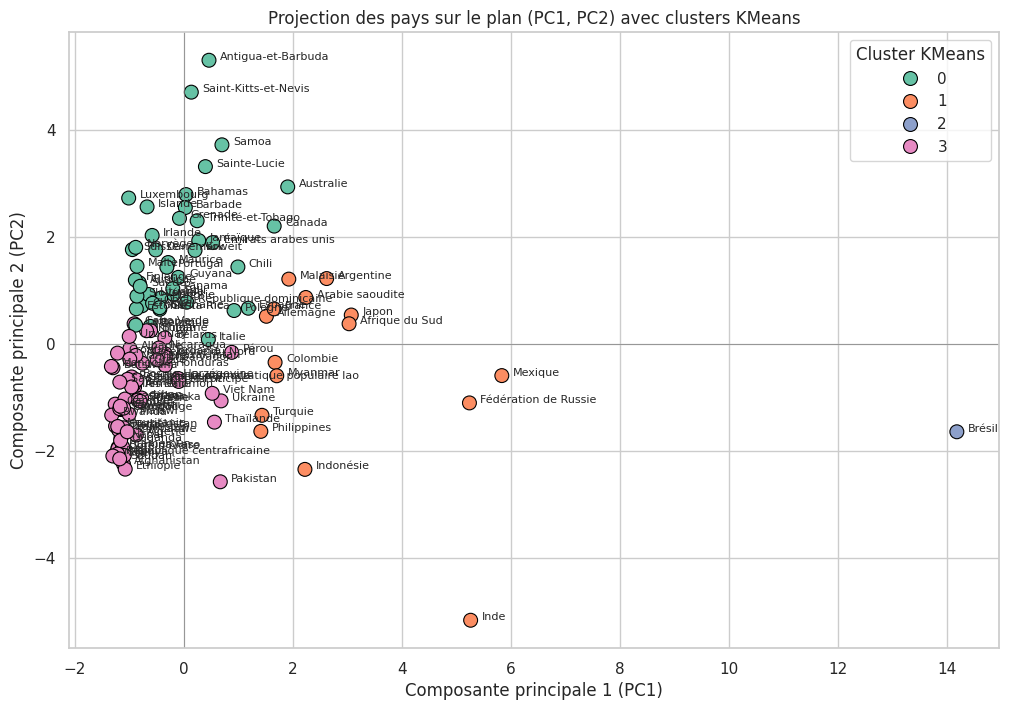

In [ ]:
# Affichage des clusters KMeans dans le plan (PC1, PC2)
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_proj,
    x="PC1", y="PC2",
    hue="Cluster_KMeans",
    palette="Set2",
    s=100,
    edgecolor="black"
)

# Affichage des noms des pays
for i in range(len(df_proj)):
    plt.text(
        df_proj["PC1"][i] + 0.2,
        df_proj["PC2"][i],
        df_proj["Zone"][i],
        fontsize=8
    )

plt.title("Projection des pays sur le plan (PC1, PC2) avec clusters KMeans")
plt.xlabel("Composante principale 1 (PC1)")
plt.ylabel("Composante principale 2 (PC2)")
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.grid(True)
plt.legend(title="Cluster KMeans")
plt.show()


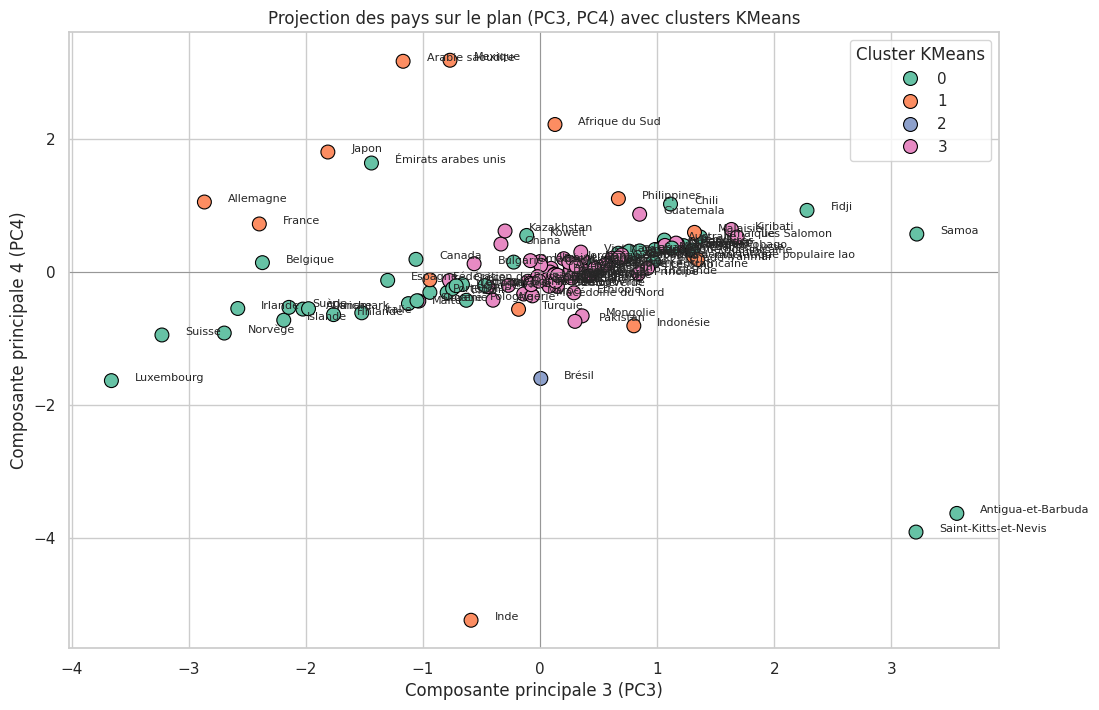

In [ ]:
# Affichage des clusters KMeans dans le plan (PC3, PC4)
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_proj,
    x="PC3", y="PC4",
    hue="Cluster_KMeans",
    palette="Set2",
    s=100,
    edgecolor="black"
)

# Ajout des noms des pays
for i in range(len(df_proj)):
    plt.text(
        df_proj["PC3"][i] + 0.2,
        df_proj["PC4"][i],
        df_proj["Zone"][i],
        fontsize=8
    )

plt.title("Projection des pays sur le plan (PC3, PC4) avec clusters KMeans")
plt.xlabel("Composante principale 3 (PC3)")
plt.ylabel("Composante principale 4 (PC4)")
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.grid(True)
plt.legend(title="Cluster KMeans")
plt.show()


Dans cette section, nous analysons les clusters obtenus avec l’algorithme K-Means, appliqué sur les 4 premières composantes principales (PC1 à PC4).

Comme pour la CAH, nous construisons un tableau de synthèse qui affiche la moyenne de chaque variable pour chaque cluster K-Means. Cela permet de mieux comprendre le profil moyen des pays de chaque groupe et de comparer les résultats avec ceux de la CAH.

Par exemple, on peut repérer :

Les groupes avec forte consommation de volaille ou grande production

Ceux avec faible stabilité politique ou forte importation

Ou encore des groupes géographiquement éloignés de la France

Ce tableau est essentiel pour interpréter les résultats de K-Means, les comparer à ceux de la CAH, et identifier les différences ou similarités entre les deux méthodes de clustering.

In [ ]:
df_final["Cluster_KMeans"] = df_proj["Cluster_KMeans"]

# Tableau de synthèse : moyennes des variables pour chaque cluster KMeans
moyennes_kmeans = df_final.drop(columns=["Zone", "Cluster_CAH"]).groupby("Cluster_KMeans").mean().round(2)

# Affichage
print("Moyennes des variables pour chaque cluster (KMeans) :")
display(moyennes_kmeans)



Moyennes des variables pour chaque cluster (KMeans) :


,Distance_France (km),Population (1000 hab),PIB par habitant (USD),Consommation volaille (kcal/personne/jour),Production poulet (tonnes),Importation poulet (tonnes),Disponibilité alimentaire poulet (kcal/personne/jour),Stabilité politique (%),Ratio_Import_Production,Consommation_volaille_totale,Dispo_alim_totale
Cluster_KMeans,,,,,,,,,,,
0,5010.08,8432.18,30231.30,33.92,238954.49,45663.93,123.14,72.78,15.20,2.500680e+08,9.124748e+08
1,7107.48,173491.55,14920.02,27.49,2110974.72,267197.82,96.87,34.03,0.20,2.255595e+09,7.655981e+09
2,8732.79,207833.82,9896.72,47.49,13607352.20,3305.78,204.00,29.52,0.00,9.870028e+09,4.239810e+10
3,5832.55,21365.91,3623.70,10.66,187635.85,22392.96,35.51,35.68,2.47,1.778888e+08,5.851374e+08


# 13. Diagramme en coordonnées parallèles des clusters CAH

Ce graphique permet de comparer les profils moyens des groupes de pays définis par la Classification Ascendante Hiérarchique (CAH).
Chaque ligne colorée correspond à un cluster, et suit l’évolution des valeurs moyennes normalisées (entre 0 et 1) pour chaque variable du dataset.


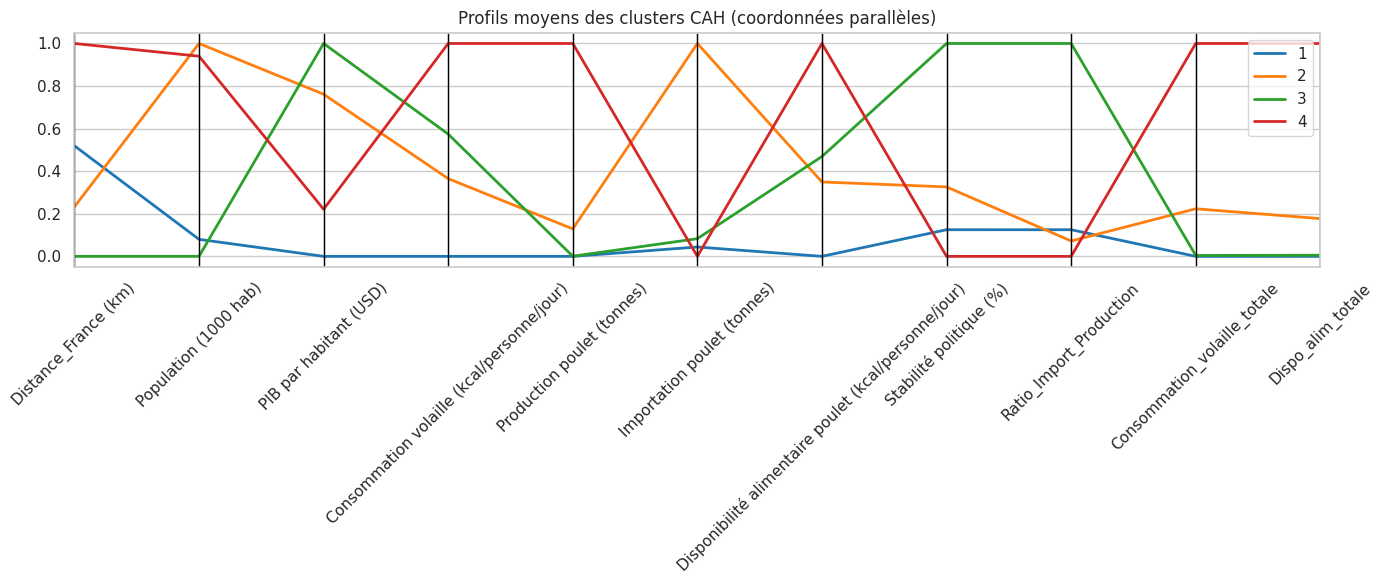

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import parallel_coordinates


# On utilise le tableau des moyennes qu'on a déjà créé
df_paralleles = moyennes_par_cluster.copy()

# On normalise les données pour que toutes les variables soient entre 0 et 1
colonnes_norm = df_paralleles.columns
scaler = MinMaxScaler()
df_paralleles_scaled = pd.DataFrame(scaler.fit_transform(df_paralleles), columns=colonnes_norm)

# On ajoute le label du cluster (comme une colonne pour les couleurs)
df_paralleles_scaled["Cluster_CAH"] = df_paralleles.index.astype(str)

# Affichage avec des couleurs personnalisées
plt.figure(figsize=(14, 6))
parallel_coordinates(
    df_paralleles_scaled,
    "Cluster_CAH",
    color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"],  # bleu, orange, vert, rouge
    linewidth=2
)
plt.title("Profils moyens des clusters CAH (coordonnées parallèles)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


🟥 Cluster 4 (rouge)
Très haut en : consommation de volaille, production, disponibilité alimentaire, distance de la france

Zéro en : importation de poulet, ratio import/production, stabilité politique

PIB par habitant ≈ 0.2 : donc modeste

➤ Profil : pays très autonomes en volaille, fort producteurs et consommateurs, mais instables et peu dépendants des importations.


🟧 Cluster 2 (orange)

pas loins de la france

Très haut en population

bon PIB

Importation élevée

Zéro en ratio import/production (→ ils importent tout)

➤ Profil : pays très peuplés, consommateurs mais dépendants des importations.


🟢 Cluster 3 (vert)

Ce cluster représente des petits pays très proches de la France, avec :

fort PIB par habitant

aucune production de volaille

dépendance totale à l'importation (ratio 1.0)

bonne stabilité politique

mais globalement faible consommation et disponibilité alimentaire

On pourrait penser à des micro-États riches, très stables, mais peu impliqués dans la filière poulet, voire peu dépendants de l’agriculture locale.
Exemples potentiels : Luxembourg, Monaco, Liechtenstein, pays nordiques riches mais peu consommateurs de volaille.



🟦 Cluster 1 (bleu)

Zéro ou très bas partout

➤ Profil : pays très pauvres, peu stables, peu consommateurs, peu producteurs, peu importateurs.
Ex : pays en difficulté ou très marginalisés dans le commerce.





# 13. Diagramme en coordonnées parallèles des clusters K-Means


Dans ce bloc, on affiche le profil moyen de chaque cluster issu de l’algorithme K-Means, sous forme de coordonnées parallèles.
Pour que les variables soient comparables entre elles, on a normalisé toutes les colonnes numériques (échelle de 0 à 1).

Chaque ligne colorée représente le profil moyen d’un cluster pour toutes les variables.

Ce graphique permet de Comparer facilement les groupes formés par K-Means ;

Visualiser quelles variables différencient chaque cluster ;

Interpréter le contenu de chaque cluster (ex. : un cluster qui consomme plus de volaille, un autre qui a un PIB plus élevé, etc.).

C’est un outil essentiel pour interpréter les résultats du clustering.

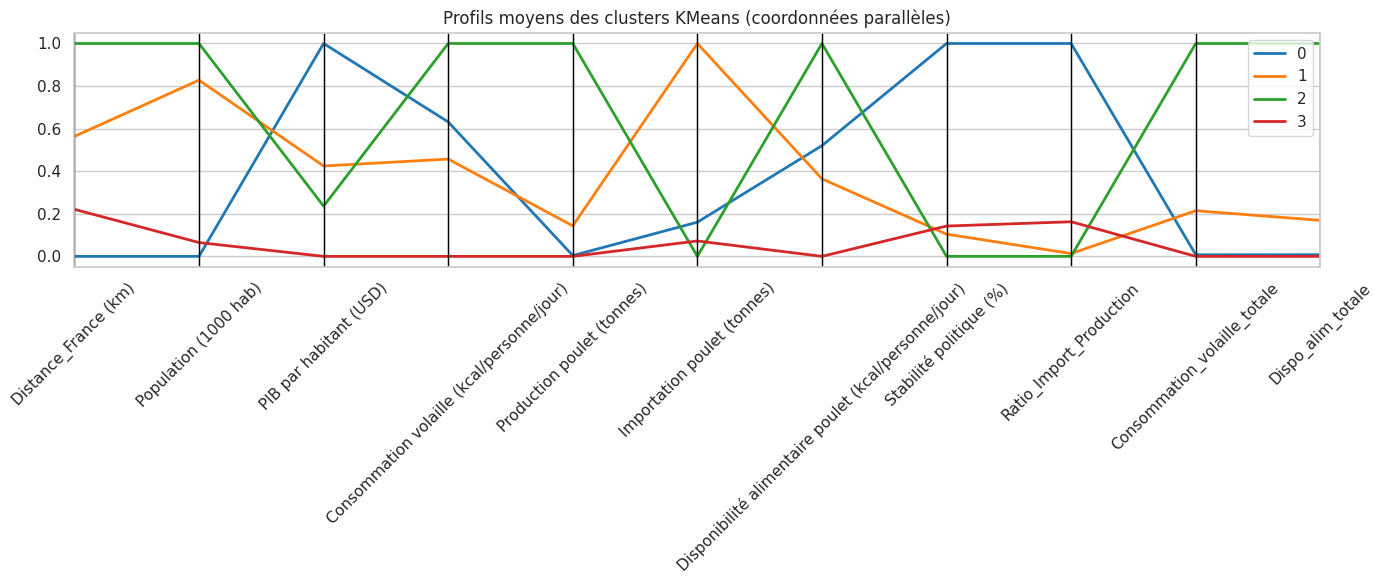

In [ ]:
# On utilise le tableau des moyennes qu'on a déjà créé
df_paralleles_kmeans = moyennes_kmeans.copy()

# On normalise les données pour que toutes les variables soient entre 0 et 1
colonnes_norm_kmeans = df_paralleles_kmeans.columns
scaler = MinMaxScaler()
df_paralleles_kmeans_scaled = pd.DataFrame(scaler.fit_transform(df_paralleles_kmeans), columns=colonnes_norm_kmeans)

# On ajoute le label du cluster (comme une colonne pour les couleurs)
df_paralleles_kmeans_scaled["Cluster_KMeans"] = moyennes_kmeans.index.astype(str)

# Affichage avec des couleurs personnalisées
plt.figure(figsize=(14, 6))
parallel_coordinates(
    df_paralleles_kmeans_scaled,
    "Cluster_KMeans",
    color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"],  # bleu, orange, vert, rouge
    linewidth=2
)
plt.title("Profils moyens des clusters KMeans (coordonnées parallèles)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



🔷 Cluster 0 (bleu)
Petits pays proches et riches, avec une forte stabilité, une bonne consommation de volaille mais peu de production locale.
👉 Type : Luxembourg, Suisse, Norvège, pays nordiques.

🟠 Cluster 1 (orange)
Grands pays peu stables, très peu autonomes sur la volaille, importent beaucoup, avec population élevée mais développement limité.

🟢 Cluster 2 (vert)
Géants agricoles autonomes, très gros producteurs/consommateurs de volaille, mais peu stables politiquement.
👉 Type : Chine, Brésil, Inde (certains aspects).

🔴 Cluster 3 (rouge)
Pays très pauvres, avec quasi aucune production, consommation, ou stabilité.
👉 Type : pays en crise, enclavés, ou insulaires très petits (ex : Haïti, pays africains isolés).


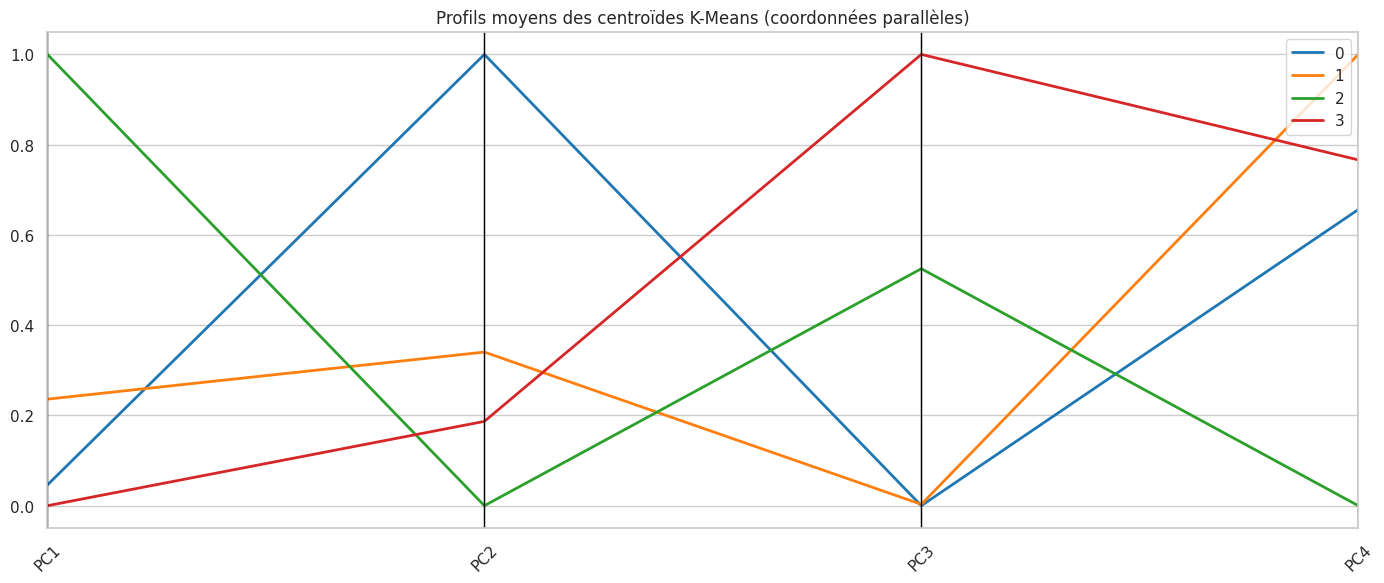

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import parallel_coordinates

# On récupère les centroïdes du modèle KMeans dans l’espace PCA
centroides_kmeans = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=["PC1", "PC2", "PC3", "PC4"]  # mêmes composantes que dans X_pca[:, :4]
)

# On normalise pour afficher entre 0 et 1
scaler = MinMaxScaler()
centroides_kmeans_scaled = pd.DataFrame(
    scaler.fit_transform(centroides_kmeans),
    columns=centroides_kmeans.columns
)

# On ajoute les étiquettes de cluster
centroides_kmeans_scaled["Cluster_KMeans"] = centroides_kmeans_scaled.index.astype(str)

# Affichage en coordonnées parallèles
plt.figure(figsize=(14, 6))
parallel_coordinates(
    centroides_kmeans_scaled,
    "Cluster_KMeans",
    color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"],  # mêmes couleurs que CAH
    linewidth=2
)
plt.title("Profils moyens des centroïdes K-Means (coordonnées parallèles)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Comparaison des clusters

### Points communs

Les **profils moyens des clusters** sont cohérents d’une méthode à l’autre, malgré quelques différences de répartition.  
Les deux méthodes font ressortir des **groupes globaux similaires** :
- des pays pauvres ou instables,
- des pays riches et proches de la France,
- des pays à profil moyen (développement intermédiaire),
- des grandes puissances agricoles.

---

### Différences

- **CAH** est plus sensible aux valeurs extrêmes et permet de mieux isoler certains **groupes très spécifiques** (ex. : petits pays très riches, ou très pauvres).
- **K-Means** produit un clustering plus **lissé**, moins précis sur les cas particuliers, mais plus **équilibré** en taille de groupes.

---

### Choix final

Nous retenons la **méthode CAH** pour ce projet, car elle permet une **segmentation fine et compréhensible**.  
Le dendrogramme rend visible la **structure hiérarchique** des regroupements.  
De plus, la CAH a permis de faire émerger **naturellement 4 profils types bien distincts** dans les données.



# Conclusion sur les clusters CAH



Parmi les 4 clusters identifiés avec la méthode CAH, le **Cluster 2** a été retenu comme cible principale pour une stratégie d’expansion.

Il présente les caractéristiques suivantes :
- **Forte population**, donc un marché important.
- **PIB élevé**, signe de pouvoir d’achat.
- **Importation de poulet élevée**, donc ouverture à l’import.

Ce cluster regroupe des pays qui sont déjà consommateurs de poulet importé, avec une demande potentiellement en croissance. Ils représentent donc une cible idéale pour une stratégie d’implantation ou d’exportation.


In [ ]:
# Copier les données finales contenant les clusters
df = df_final.copy()

# Filtrer les pays appartenant au cluster CAH 2
cluster_cible = df[df['Cluster_CAH'] == 2]

# Trier les pays du cluster 2 par importation de poulet (en tonnes)
cluster_cible_sorted = cluster_cible[['Zone', 'Importation poulet (tonnes)', 'Population (1000 hab)', 'PIB par habitant (USD)']]\
                        .sort_values(by='Importation poulet (tonnes)', ascending=False)

# Affichage classique
display(cluster_cible_sorted)



,Zone,Importation poulet (tonnes),Population (1000 hab),PIB par habitant (USD)
71,Mexique,788425.83,124777.324,9693.330262
95,Arabie saoudite,730959.59,33101.179,20910.482962
55,Japon,569477.41,127502.725,38928.952604
117,Afrique du Sud,480189.97,57009.756,6723.928582
28,Allemagne,474950.62,82658.409,44670.222282
2,Émirats arabes unis,440543.30,9487.203,43063.967477
37,France,373883.40,64842.509,40458.149878
93,Fédération de Russie,218668.52,145530.082,10822.770083
49,Inde,17.77,1338676.785,1937.924539


### Exemples de pays du cluster 2 (CAH)

Voici quelques pays appartenant au cluster 2 :

- **Japon** : fort pouvoir d’achat, grande population, importateur important.
- **Mexique** : très gros volumes importés, marché important.
- **Allemagne** : stabilité économique, importations significatives.
- **Arabie Saoudite** : marché de niche avec forte demande importée.
- **Afrique du Sud** : bon équilibre entre volume et accessibilité.

Ces pays présentent un **fort potentiel d’extension commerciale**, car ils allient **demande existante**, **marché important**, et **accessibilité économique**.
